In [44]:
# load dataset
import seaborn as sns

data = sns.load_dataset('titanic')

data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
# EDA
print('5 data teratas:\n', data.head())

print('\nCek Missing Values:\n', data.isnull().sum())

print('\nDistribusi Target:\n', data['survived'].value_counts())

5 data teratas:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Cek Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who      

In [46]:
# handle missing values

# Imputasi kolom age
data['age'] = data['age'].fillna(data['age'].median())

# Drop kolom deck (karena terlalu banyak kosong)
data = data.drop('deck', axis=1)

# drop kolom alive
data = data.drop('alive', axis=1)
# Imputasi embark_town dengan mode
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])


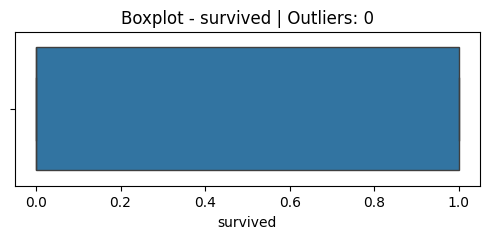

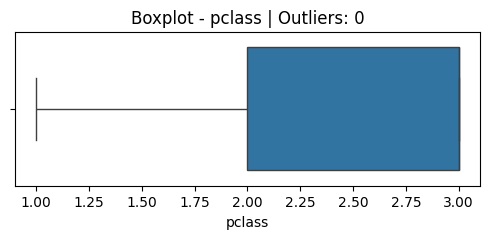

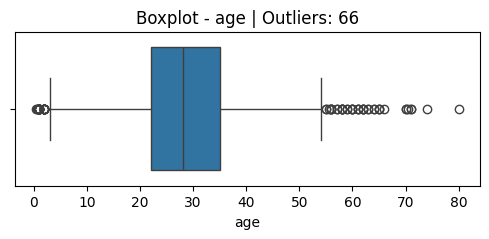

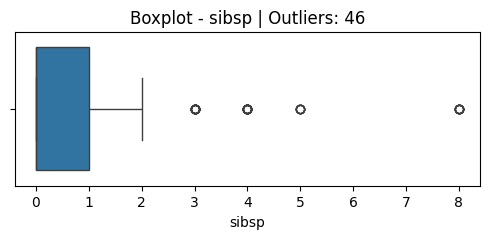

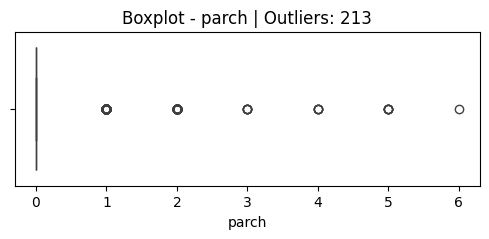

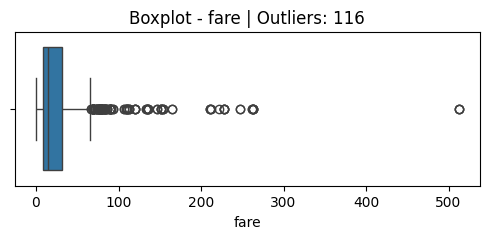

In [47]:
# Cek outlier
# IQR
import matplotlib.pyplot as plt

# ambil kolom numerik
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

iqr_outliers = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)
    iqr_outliers[col] = outlier_mask.sum()

    # boxplot
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot - {col} | Outliers: {iqr_outliers[col]}')
    plt.show()


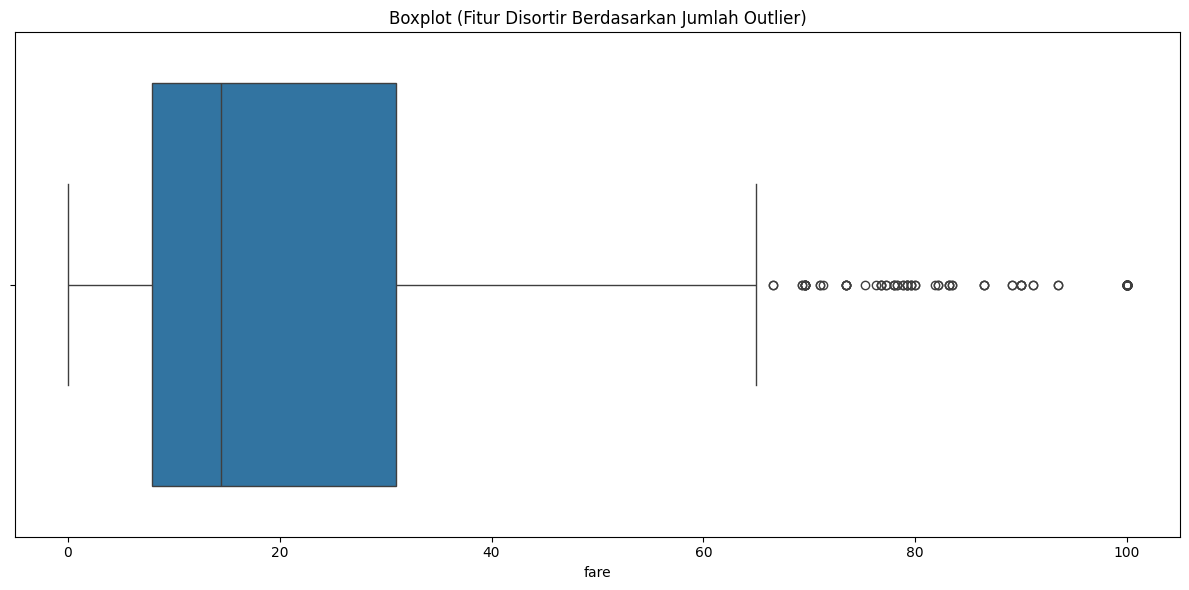

In [48]:
# handle outlier
import numpy as np
data['fare'] = np.clip(data['fare'], 0, 100)
data['age'] = np.clip(data['age'], 0, 100)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['fare'], orient='h', showfliers=True)
plt.title("Boxplot (Fitur Disortir Berdasarkan Jumlah Outlier)")
plt.tight_layout()
plt.show()


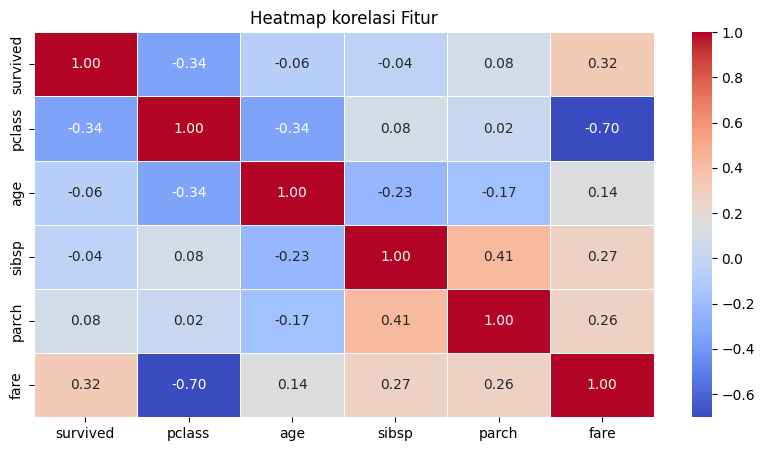

In [49]:
# cek korelasi 
import seaborn as sns
import matplotlib.pyplot

# filter hanya kolom numerik
data_numeric = data.select_dtypes(include=['number'])

# cek korelasi

plt.figure(figsize=(10, 5))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap korelasi Fitur')
plt.show()

In [51]:
# Encoding

import pandas as pd
# Copy data dulu biar aman
data_encoded = data.copy()

# Buat encoding ke semua kolom object
data_encoded = pd.get_dummies(data_encoded, drop_first=True)  # drop_first biar nggak dummy trap

# Cek hasil
data_encoded.head()

# Split data
from sklearn.model_selection import train_test_split

X = data_encoded.drop('survived', axis=1)
y = data_encoded['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [52]:
# training model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# model
model = RandomForestClassifier(random_state=42)

# fiting 
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluasi
print(f'Classification report : {classification_report(y_test, y_pred)}')
print(f'Confusion matrix :\n {confusion_matrix(y_test, y_pred)}')

Classification report :               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

Confusion matrix :
 [[98 12]
 [19 50]]
